In [6]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [7]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-01-05 14:21:28--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2025-01-05 14:21:28 (27.3 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [8]:
features = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = dataset['expenses']

In [9]:
features = pd.get_dummies(features, columns=['sex', 'smoker', 'region'])

In [10]:
features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,True,False,False,True,False,False,False,True
1,18,33.8,1,False,True,True,False,False,False,True,False
2,28,33.0,3,False,True,True,False,False,False,True,False
3,33,22.7,0,False,True,True,False,False,True,False,False
4,32,28.9,0,False,True,True,False,False,True,False,False


# SPLITTING DATA

In [11]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Build Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(train_features, train_target)

model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(train_features, train_target)



RandomForestRegressor(random_state=42)

In [14]:
predictions = model.predict(test_features)

In [15]:
predictions1 = model1.predict(test_features)

# Model Evaluate

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_target, predictions)
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)
print(f"MAE: {mae}, MSE: {mse}, R-squared: {r2}")

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

MAE: 4181.561524000786, MSE: 33600065.35507784, R-squared: 0.7835726930039905
The Mean Abs Error must be less than 3500. Keep trying.


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_target, predictions1)
mse = mean_squared_error(test_target, predictions1)
r2 = r2_score(test_target, predictions1)
print(f"MAE: {mae}, MSE: {mse}, R-squared: {r2}")

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

MAE: 2571.864662985075, MSE: 21462380.942466956, R-squared: 0.8617548727952514
You passed the challenge. Great job!


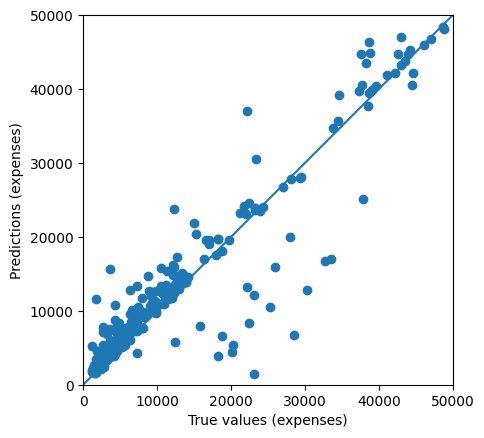

In [18]:
test_predictions = model1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_target, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)